# Predicting Prices of Used Cars on Craigslist

## Intro

### Context
Buyer’s Choice (BC) is a smalled used car company based in CT lead by CEO Dapper Dan. BC's usual process for deciding to buy vehicles from the warehouse is to determine what the likely price would be if the vehicle was sold in the store (BC Price). If the BC Price is over $5k greater than the warehouse price they buy the vehicle. 

However with the advent of Covid people just are not coming into the store. So they have switched to selling their cars online. These prices often differ from the prices they would normally get at the store.

The company was recently been given the option to buy 30 of the 2018 Tesla Model 3’s at $ 30K. They want to know if they should take the deal. 

### 1. Problem statement 
Should used car dealership Buyer’s Choice buy 30 gently used 2018 Tesla 3 at the price of \\$ 30K? To answer this question we need to predict the price of selling a 2018 Tesla 3 online. If it is above $ 30K we should buy the vehicles. 


### 2. Data

To determine online prices we look at the price of used vehicles on Craigslist. The dataset we used was created by Austin Reese January 2020 from scraping data from  "every used vehicle entry within the United States" on Craigslist on Feb 2020. Besides price this data includes other this listed on the used vehicle entry like mileage, the model and condition of the vehicle. Link: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Four other supplementary databases were used:

1) For vehicle model data we used data from from back4app an open data source that uses categories vehicle models based on US department of transportation. These categories are grouping such as "convertible" or "pickup".
Website: https://www.back4app.com/database/back4app/car-make-model-dataset

2) We also tried to find vehicle MSRP (aka price the market price listed by companies when the vehicle was new). We used data scraped from Edmunds (One of the most well known reviews of automobiles and their prices in the USA). This data was scraped, compiled and put on kaggle by CopperUnion in 2016 "https://www.kaggle.com/CooperUnion/cardataset"

3) State Gas prices  come from AAA which shows the daily average gas prices for a state. They do not store this data so the data was scraped from the next nearest date available from the scraping of the Craiglist data which was Feb 22 https://web.archive.org/web/20200226222808/https://gasprices.aaa.com/state-gas-price-averages/


4) This data for household income by state was from https://dqydj.com/average-income-by-state-median-top-percentiles/ a place that holds financial data and that is recommend by the WSJ and the NYT.

### 3. Data Cleaning- Data Cleaning rules

We want to use data that will help us predict the price of a good condition vehicle. Therefore we are not looking at million dollar superluxury cars nor are we looking at vehicle that are being sold for scraps or as junkers.

* Since we are trying to predict the price of vehicles when we know the vehicle's Make, Model, Model Year, Mileage and condition we eliminate from the data set vehicles where price, make, model, model year, mileage and condition are not listed.
* This study is not looking at Super luxury cars/ antique cars: 
    * None of the vehicles should have a price greater than half a million
    * If MSRP is listed none of the vehicles should have an MSRP greater than a million
* This study is not looking at motorbikes or busses 
    * We don't need Harley Davidson’s or Hennessey’s 
* This study is not looking at junker cars so we do not need vehicles:
    * Priced at 1000 dollars or less
    * That have over a half million miles on them
    * In poor condition or have a title status equal or worse than salvage
    * Are over than 10 years old (we are also not looking at antique cars)
* Cleaning obvious errors:
    * We are looking at used vehicles so the vehicles age should be greater than 1 year
    * String Cleaninging aka "BMW" or "bmw" or "BMW   " are all manufactured by BMW
 
    

In [ ]:
Link to Data Cleaning Section

### 4. Data Manipulation- Merging Data

#### 4a. Mapping state data gas prices to state where the vehicle was sold


#### 4b. Using the MMY from each vehicle we map what category the vehicle belongs to

Defining MMY
* Automobiles models are referenced by its a) manufacture b) model name, and C) model year (otherwise known as the MMY)
* Each mmy has an average MSRP to go with it and a specific groups of catehories can be in 
    * (ex a camry can be sedan or hatchback it can't be a pickup)
* We will therefore use the MMYas a key to map the MSRP and category to the main data set

Issue: Model names of automobile
* The trim of a model is referencing a set of additional features comes with (example Camry Lux has leather seats)
* The trim changes the price of a vehicle
* Therefore sometimes sellers will add the trim after the model design to give a better idea of what they are selling
* This leads to the model name not being consistent across tables.

Fixing the Issue
* To ensure better mapping we will therefore use 2 keys 
* The first key will match the full name of the model for the mmy
* The second key will match the first word name of the model for the mmy
* We will try to map to first the key if a map isn't reached we use the results from the second key.
* both keys include the manufacturer and model year    

In [ ]:
Link to Data Manipulation Section

### 5. Data Imputation

When looking at the vehicles we note that there are lot of nulls about the vehicles features (example: the number of cylinders, drive, transmission, size, and type of vehicle). When buying a vehicle these are things you would usually ask the seller because it does effect the price of the vehicle (a vehicle with more cylinders usually is of higher value than one is of less). 

While these features can differ within a make (aka brand here listed as manufacturer) model, and model year (MMY) of a vehicle we can narrow down what the feature should be given the other features of the vehicle. For example: a  2016 Jaguar F-Type  can be all wheel drive or all-wheel drive ,  be a coupe or convertible, be automatic or manual transmission. You would think there be at least 8 configurations of the F-type.   However only a certain grouping of configurations (called Trims) that these vehicle are sold as.  There are actually on 6 configurations for the 2016 Jaguar F-Type because you can only get a manual transmission with rear wheel drive. 

If we don't have enough data to impute the vehicle given MMY and the other features we can determine the feature given its MMY. This is because A) There is usually a most popular trim for the MMY of a vehicle. B) Some features do not differ within MMY for example the 2017 Honda Accord only has 4 cylinders. 

If MMY does not give us a value we can look at just the make and model. The most likely configuration for model does change for each model year. However the trims of these features only change for every redesign of the model which does not happen every model year. So after looking a MMY we look at make model.

In [ ]:
Link to Data Imputation Section

### 6. EDA

#### 6a EDA- Removing Outliers
We do not want any outliers in our dataset before we make any calculations. However we already eliminated a lot of the outliers due to the common sense cleaning rules (this paarticularly true for age, price and mileage). Further price, and mileage have a s non normal distribution. They both have long tails as values get higher (there are fewer and fewer very expensive vehicles or vehicles with high mileage). They both have a cut at low values as neither mileage nor price is a negative values. Due to all these deletions we have to be consertive in stating a variable is an outlier for mileage, price or any variable to price or mileage aka Avg Mileage or MSRP.


Therefore we are conservative in our deletion for these variables. :
* The 98the percentile and the 99th percentile differ by larger than 1 standard deviation. Then all values greater than the 98th percentile are likely to be outliers.
* Similarly elimiate if 99th percentile and maximum differ by larger than 1 standard deviation. Then all values greater than the 99th percentile are likely to be outliers.

The results of this investigation is that odometer (mileage), average mileage, price, and cylinders needed to be investigated.



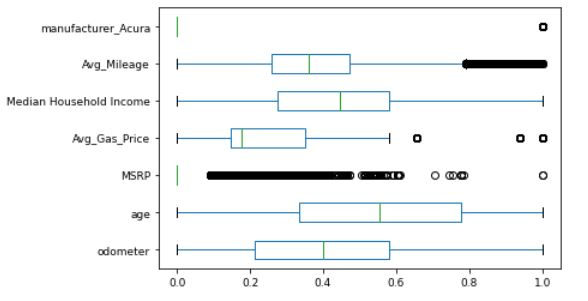

In [6]:
from IPython import display 
display.Image("figures/histograms.JPG")

#### 6b EDA- Visualizing Relationships within the dataset
High corelation linear
* Price , MSRP, 
* Price ,  cylinders drive mileage
* MSRP , cylinders
* Residual,  cylinders
decent correlation 
* Price odometer
* price age
* age odometer (this does not make sense this should have stronger relationship)

### 7. Feature Selection/ Manipulation

#### 7a. Adding Variables: Residual and Average Mileage
* Average mileage: A 10 year old vehicle with 10000 miles on it is considered to have been much more gently used than a 1 year vehicle with 10000 miles on it.


#### 7b. Feature Selection: Dropping Categorical Variables
* We want to reduce the number of unnecessary variables. Below are some of the reasons:
* We eliminate categorical variables that are included in another variable (aka inter correlation)
    * Example Division, State, and region. As each state has only one division. Each region can only fit in one states
    * We eliminated type and Category as they both fit within Category_cleaned
* We Eliminate categorical variables that are either unique to each vehicle or have too many categories within it because that would create too many dummy variables 
    * There are over 10000 models and while models are not completely unique to each vehicle considering we are trying to determine the asking price when we don't know the value of the model it goes around the point of the study. However again it could be something to look into.
    * There are over 400 regions while this could be an interesting study we don't need it as we have division, longitude and latitude. It might be something to look into for another study
    * There are over 50 states while this could be an interesting study we don't need it as we have division, longitude and latitude. It might be something to look into for another study.
* We eliminate variables that have only one value as the don't add anything to the model
    * title status
    
#### 7c. Feature Selection: Dropping Continous Variables
We check correlation between our features. We do not want highly correlated variables (aka correlation whose absolute value is of over 0.8 in our data). In our investigation we only find year which is highly correlated to age. We therefore eliminated year from our variables.

#### 7d . Feature Selection: Handling the nominal variables (aka cylinders)
* Cylinders is an nominal variable. That means it is ordinal (1 cylinder < 2 cylinders) but it is non-continous (no such thing as half a cylinder). This is hard to model. We can either treat it as a categorical varible or we can treat is numerical variable.
    * Treating cylinders as a categorical variable: Pro: No wrong assumptions Con: Loss of ordering
    * Treating cylinders as a numerical variable: Pro:keep ordering information. It allows us to analyze the data using techniques that is familiar and easily understandable. Con: Incorrectly assumes continuosness
* We prefered to lose information than to assume incorrectly so we changed cylinders to a categorical variable



In [ ]:
linke Spearman

### 8. Pre Processing the Data

Befeore we can use the data to generate a model we need to make the data able to be understood by the model. In this case we scale the data and turn all our categorical variables into dummy variables. We then seperate the data into our training data and test data.

#### 8a. Chosing Scaler Standardization

###### Standizing Data
* We have a few methods of standardization to choose from: Robust, Minmax, Normalize and Standardize
* We use Robust if we want to minimize impact of outliers
* We use Normalize if we think the distrubtion within a variable needs to be normalized and/or has a normal distribution
* We use Standardize when we think most of the variables have similar distribution and no/few dummy variables

##### Choosing Min Max Scaler
* The data for price is and age are not a normal destribution we eliminate normalize scaler
* No large outliers as that was cleaned out already earlier we eliminate  Robust Scaler
* As we have dummy variables we can eliminate standard scaler 
* That leaves us with Min Max scaler

#### 8b. Pre Processing Feature Selection:Dummy Variables

##### Turn each Categorical variable into multiple dummy variable
* For example instead of having one variable for fuel where the value is listed("gas" or "electric", or "diesel"). we create  dummy variables gas, electric and diesel.

##### Eliminate variables due to intercorrelation

1) Group Intercorrelation
When we have a categorical variables and convert them into dummies we can cannot have all the dummies in the group since  the last dummy variable will be a linear combination of the other dummies. So we therefore eliminate one variable from the group.

2) Eliminate variables where absolute correlation is greater 0.8


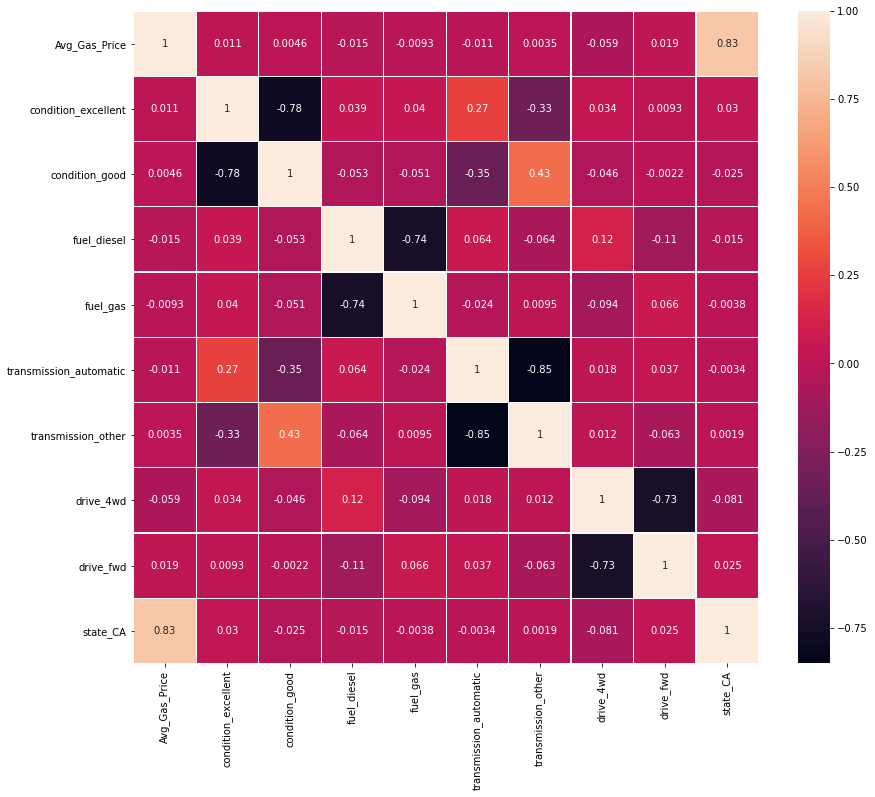

In [12]:
from IPython import display 
display.Image("correlation.png")

### 9. Choosing the Correct Algorithm


We tested 10 different regression models 
* Linear Regression
* Linear Log Regression
* Ridge Regression
* Elasticnet Regression
* Decision Tree Regression --- > decision forest
* Extra Tree Regression
* Gamma Regression
* Ridge with PCA
* Linear with PCA
* elasticnet with PCA

We Test with Two parameterrs
* Median Absolute Error: MAE
* Mean Percentage Error: MPE

Our dealer is using our prediction to decide if the asking price is lower than the predicted price he could get on Craig's list. The dealer is risk averse he does not want to take the deal if there is a high chance that the predicted price he is using is larger than the actual price. Therefore between two equally accurate models he would prefer if the  predictions under valued the car then over valued the car.

The Median Absolute Error (MAE) is useful for just getting an overall fit of the model.It is a quick and easy way to compare how well one model does versus the other. Further it is not effected by the number of parameters as say R squared. This will give us the close prediction that we want. The closer the MAE

The Median Percentage Error (MPE) tells us if our regression over estimates (positve MPE) or under estimates (negative MPE).  Between two similar models in accordance to our dealer's risk aversion we prefer a negative MPE. 

For More Information:

https://www.dataquest.io/blog/understanding-regression-error-metrics/


### Comparing Models

#### Winner Algorithm: Random Forest Regression

As we look at the 9 models we find a two overall trends:
* All of these models over estimate versus under estimate (MPE is negative).
* Models error is correlated to explanotry variable (price).

Within these nine models we can group them into PCA, Linear Algorthim and Ensemble:
* Models with the PCA have hive higher MAE and the absolute value of their MPE is larger than the other models so we eliminate
* 3 Linear Algortihm (Elastic Net, Linear Regression and Ridge Regression) have very similar MAE results around ()
* Of the linear type of regressions Gamma had the best results. That makes sense as the explanatory variable (price) does not have a normal distribution but skews left.
* Ensumble methods (Random Forest and Extra Tree) have 
    * The best MAE and MPE scores
    * The least price to error correlation 

Within Ensemble Methods:
* Random Forest Regression  MAE Test results are better than Extra Tree train scores
* Random Forest Regression  MPE Test results are within Exra Tree MPE test results + strandard deviation
* We therefore pick Randon Forest Regression.




In [7]:
import os
import pandas as pd
basepath = os.getcwd()
sub_file = 'data'
file = 'model_comparison.csv'
file_name_path = os.path.join(basepath, sub_file, file)
pd.options.display.float_format = '{:.4f}'.format
score_tab= pd.read_csv(file_name_path)
score_tab.sort_values('MAE Test')



,Algorithm,MAE Train,MAE Test,MAE Test std,MPE Train,MPE Test,MPE Test std
3,Random Forest,1372,1635,28.9931,-0.0007,0.0004,0.0016
4,Extra Tree,1559,1902,44.9899,0.0000,0.0014,0.0012
5,Gamma,2061,2125,31.2403,-0.0078,-0.0079,0.0039
2,ElasticNet,2257,2289,33.0975,-0.0148,-0.0122,0.0033
0,Linear,2259,2323,33.0916,-0.0030,-0.0012,0.0040
1,Ridge,2259,2323,33.6993,-0.0030,-0.0011,0.0040
6,PCA Linear,2684,2680,32.6655,-0.0150,-0.0129,0.0065
7,PCA Elastic,2707,2744,20.1370,-0.0392,-0.0369,0.0055


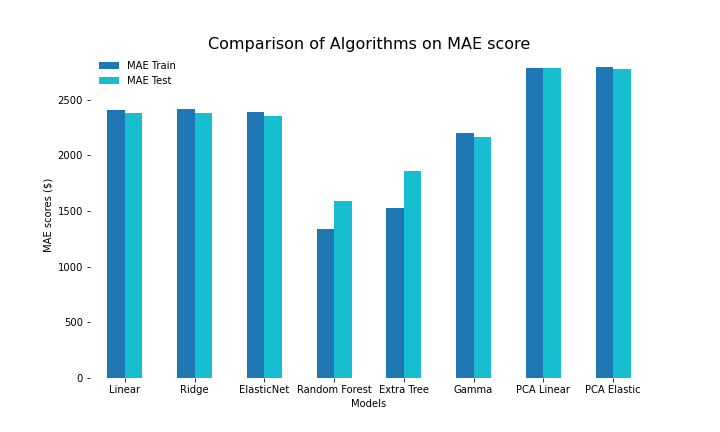

In [1]:
from IPython import display 
display.Image("Figx_ModelComparison.png")



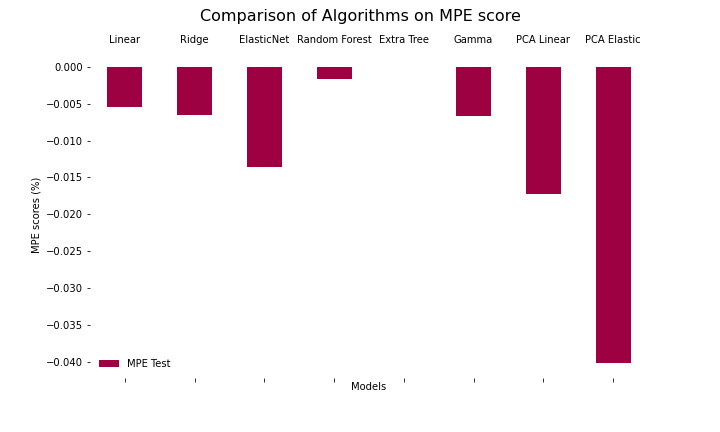

In [3]:
from IPython import display 
display.Image("Figx_ModelComparison_MPE.png")

### 10.  Optimizing Random Forest Regression
Now that we know that Random Forest looks like the best model we use a grid search to find the best parameter. 
We look in particular at the minimum samples per leaf, maximum number of feat. and minimum number of splits.

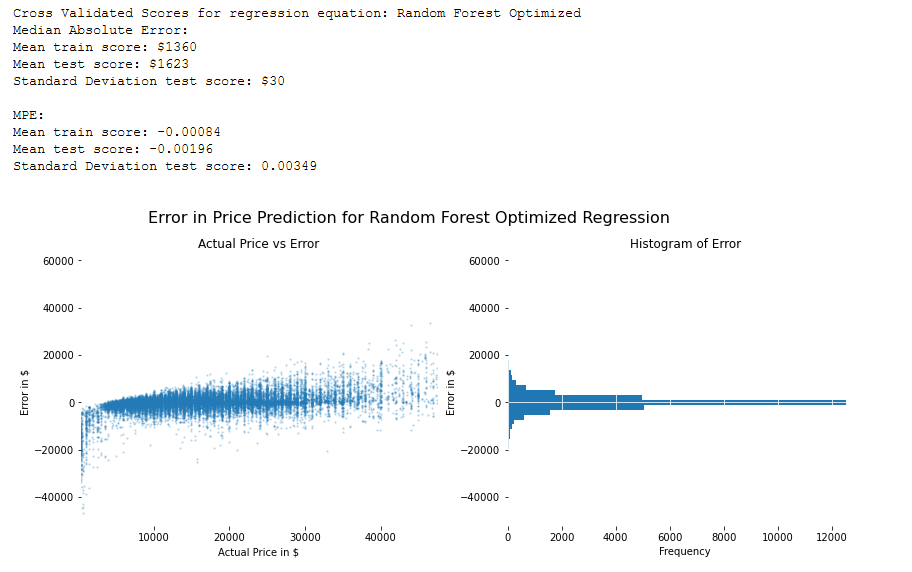

In [4]:
from IPython import display 
display.Image("figures/OptimizedRandomForest.png")


### 11.  Validation the Model

### 12.  Random Forest Regression Feature Importance

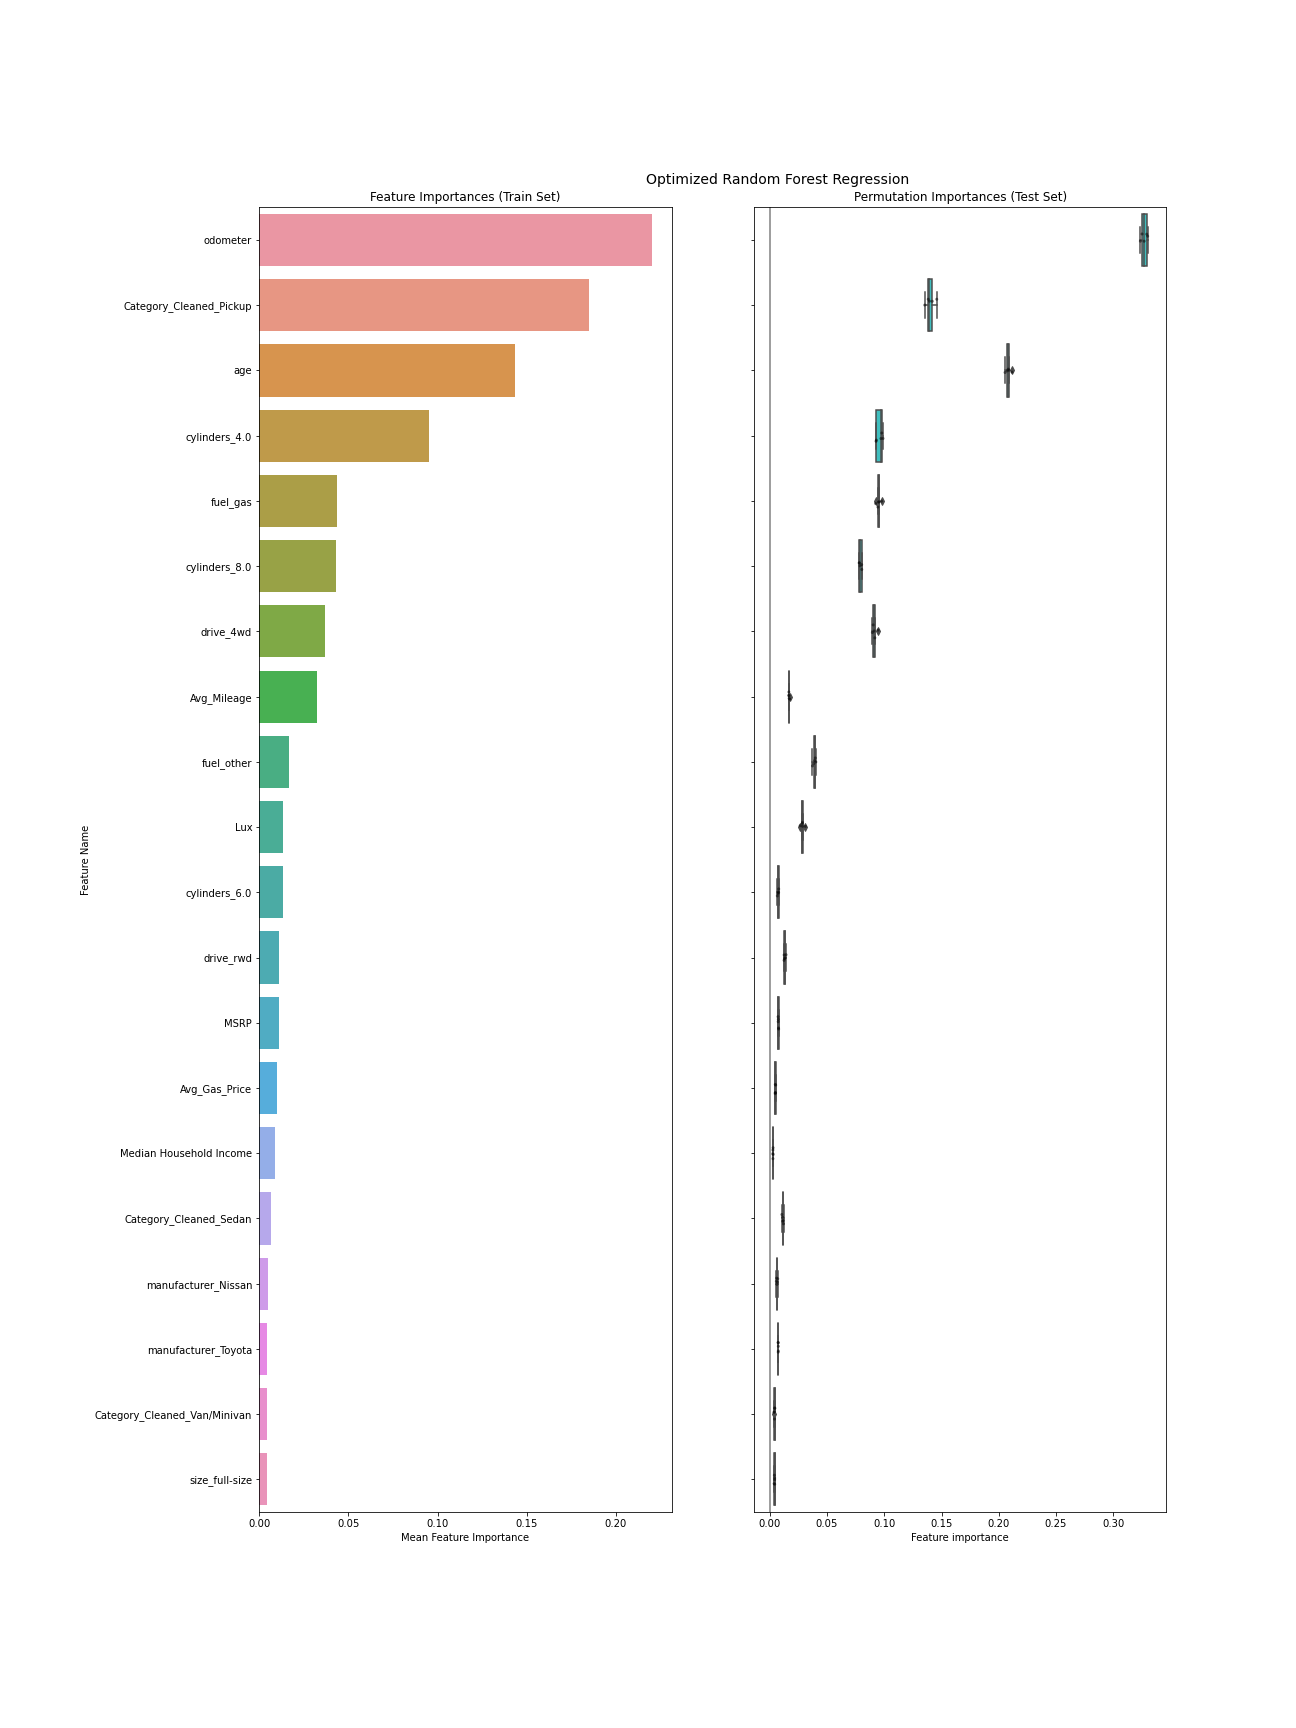

In [6]:
from IPython import display 
display.Image("Feature Importance.png")


### Prediction 
    #TBD
    https://www.edmunds.com/inventory/srp.html?inventorytype=used%2Ccpo&make=tesla&model=model-3&year=2018-2018&mileage=25000-35000

Edmunds


### Next Steps
    * Redo this study with More MSRP data available
    * Search for other possible variables that correlates with auto price
        * The bias seen in the non ridge regression models shows there is another variable we should be looking for.
    * Search within text description for words that correlate with the need for Craiglist seller need to sell soon.
        * Craig's list sellers are sometimes by time. That would influence price further down.